# FINAL OBSERVATIONS
***AS PER BASE ON RECORDS TILL 7th July,2020***


* When looking at the number of death per million, San Marino is now the country with the highest number of Deaths per Million. The ranking would be as follows:
> 1. San Marino 2. Belgium	3. United Kingdom 4. Andorra 5. Spain

Countries such as Belgium, Italy and Spain have rates around 500-900 Death per Million, the state of New York has 1259 Deaths per Million.

* Qatar is the country with most confirmed cases per million inhabitants. Most other countries in the "top" 10 of countries with the highest numbers of cases per million inhabitants are Western European countries.

* The US,Brazil are the countries with the highest (absolute) number of confirmed cases and unfortunately the trend is steep upward. Over the past weeks the US has also passed Spain and Italy regarding the total number of Deaths.

* When looking the the time series of the cumulative numbers of deaths while taking the day of the first reported death as "Day Zero", we can see that China managed to flatten the curve while in Italy and Spain the number of victims really exploded after 15-20 days after the first casualty. Although more "delayed", the trend is now looking very bad for especially the US.

* Belarus, Saudi Arabia and United Arab Emirates are doing best when looking at the number of deadly victims relative to the number of confirmed cases.

# Preprocessing

In [1]:
# Installimg some libraries

#pip install addfips
#pip install pycountry
#pip install countryinfo

## importing libraries

In [2]:
import pandas as pd
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import pycountry
from countryinfo import CountryInfo
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Datasets

Dataset Informations:


* df_total: This Dataset Contains all information of COVID cases on the day 7th July, 2020 across the globe.
* df_confirmed,df_death,df_recovered: These Dataset contains the confirmed cases,deaths,recoveries due on everyday basis till the day of 7th July, 2020 across the globe at country level repectively.


In [4]:
df_total = pd.read_csv('csse_daily.csv')
df_total.tail(3)

FIPS   Admin2 Province_State Country_Region          Last_Update  \
3810      NaN      NaN            NaN       Zimbabwe  2020-07-13 04:43:04   
3811  16061.0    Lewis          Idaho             US  2020-07-10 02:34:22   
3812  41069.0  Wheeler         Oregon             US  2020-07-06 19:33:59   

            Lat       Long_  Confirmed  Deaths  Recovered  Active  \
3810 -19.015438   29.154857        985      18        328   639.0   
3811  46.233153 -116.434146          1       0          0     1.0   
3812  44.726982 -120.028143          0       0          0     0.0   

             Combined_Key  Incidence_Rate  Case-Fatality_Ratio  
3810             Zimbabwe        6.627228             1.827411  
3811     Lewis, Idaho, US       26.055237             0.000000  
3812  Wheeler, Oregon, US        0.000000                  NaN

In [5]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_confirmed.head(3)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  7/6/20  7/7/20  \
0        0        0        0        0  ...   32672   32951   33190   33384   
1        0        0        0        0  ...    2819    2893    2964    3038   
2        0        0        0        0  ...   15500   15941   16404   16879   

   7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0   33594   33908    34194    34366    34451    34455  
1    3106    3188     3278     3371     3454     3571  
2   17348   17808    18242    18712    19195    19689  

[3 rows x 178 columns]

In [6]:
df_death = pd.read_csv('time_series_covid19_deaths_global.csv')
df_death.head(3)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  7/6/20  7/7/20  \
0        0        0        0        0  ...     826     864     898     920   
1        0        0        0        0  ...      74      76      79      81   
2        0        0        0        0  ...     946     952     959     968   

   7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0     936     957      971      994     1010     1012  
1      83      83       85       89       93       95  
2     978     988      996     1004     1011     1018  

[3 rows x 178 columns]

In [7]:
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')
df_recovered.head(3)

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/4/20  7/5/20  7/6/20  7/7/20  \
0        0        0        0        0  ...   19164   19366   20103   20179   
1        0        0        0        0  ...    1637    1657    1702    1744   
2        0        0        0        0  ...   11181   11492   11884   12094   

   7/8/20  7/9/20  7/10/20  7/11/20  7/12/20  7/13/20  
0   20700   20847    20882    21135    21216    21254  
1    1791    1832     1875     1881     1946     2014  
2   12329   12637    13124    13124    13743    14019  

[3 rows x 178 columns]

## Common Dataframe

In [8]:
df = pd.DataFrame()

df['Country'] = [a for a in df_confirmed['Country/Region'] for b in range(3,len(df_confirmed.columns))]

df['Date'] = [df_confirmed.columns[b] for a in df_confirmed['Country/Region'] for b in range(3,len(df_confirmed.columns))]

In [9]:
df

Country     Date
0      Afghanistan     Long
1      Afghanistan  1/22/20
2      Afghanistan  1/23/20
3      Afghanistan  1/24/20
4      Afghanistan  1/25/20
...            ...      ...
46545      Lesotho   7/9/20
46546      Lesotho  7/10/20
46547      Lesotho  7/11/20
46548      Lesotho  7/12/20
46549      Lesotho  7/13/20

[46550 rows x 2 columns]

In [10]:
df['total_cases'] = [df_confirmed[str(df.Date[i])][df_confirmed['Country/Region'] == str(df.Country[i])].values[0] for i in range(df.shape[0])]

df['new_cases'] = df['total_cases'] - df.groupby(['Country'])['total_cases'].shift(1)
df['new_cases'][df['new_cases'].isna()] = df['total_cases'][df['new_cases'].isna()]

In [11]:
df

Country     Date  total_cases  new_cases
0      Afghanistan     Long    67.709953  67.709953
1      Afghanistan  1/22/20     0.000000 -67.709953
2      Afghanistan  1/23/20     0.000000   0.000000
3      Afghanistan  1/24/20     0.000000   0.000000
4      Afghanistan  1/25/20     0.000000   0.000000
...            ...      ...          ...        ...
46545      Lesotho   7/9/20   134.000000  43.000000
46546      Lesotho  7/10/20   184.000000  50.000000
46547      Lesotho  7/11/20   184.000000   0.000000
46548      Lesotho  7/12/20   233.000000  49.000000
46549      Lesotho  7/13/20   245.000000  12.000000

[46550 rows x 4 columns]

In [12]:
df['total_recovered'] = [df_recovered[str(df.Date[i])][df_recovered['Country/Region'] == str(df.Country[i])].values[0] for i in range(df.shape[0])]

df['new_recovered'] = df['total_recovered'] - df.groupby(['Country'])['total_recovered'].shift(1)
df['new_recovered'][df['new_recovered'].isna()] = df['total_recovered'][df['new_recovered'].isna()]

In [13]:
df

Country     Date  total_cases  new_cases  total_recovered  \
0      Afghanistan     Long    67.709953  67.709953        67.709953   
1      Afghanistan  1/22/20     0.000000 -67.709953         0.000000   
2      Afghanistan  1/23/20     0.000000   0.000000         0.000000   
3      Afghanistan  1/24/20     0.000000   0.000000         0.000000   
4      Afghanistan  1/25/20     0.000000   0.000000         0.000000   
...            ...      ...          ...        ...              ...   
46545      Lesotho   7/9/20   134.000000  43.000000        20.000000   
46546      Lesotho  7/10/20   184.000000  50.000000        26.000000   
46547      Lesotho  7/11/20   184.000000   0.000000        26.000000   
46548      Lesotho  7/12/20   233.000000  49.000000        32.000000   
46549      Lesotho  7/13/20   245.000000  12.000000        33.000000   

       new_recovered  
0          67.709953  
1         -67.709953  
2           0.000000  
3           0.000000  
4           0.000000  
...              ...  
46545       9.000000  
46546       6.000000  
46547       0.000000  
46548       6.000000  
46549       1.000000  

[46550 rows x 6 columns]

In [10]:
df['total_death'] = [df_death[str(df.Date[i])][df_death['Country/Region'] == str(df.Country[i])].values[0] for i in range(df.shape[0])]

df['new_death'] = df['total_death'] - df.groupby(['Country'])['total_death'].shift(1)
df['new_death'][df['new_death'].isna()] = df['total_death'][df['new_death'].isna()]

In [11]:
# there is problem with the information of canada
df = df[df['Country'] != 'Canada']

In [12]:
df2 = df.copy()

## Adding ISO codes for plotting

In [13]:
list_countries = df['Country'].unique().tolist()
d_country_code = {}
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})



could not add ISO 3 code for -> Congo (Brazzaville)
could not add ISO 3 code for -> Congo (Kinshasa)
could not add ISO 3 code for -> Diamond Princess
could not add ISO 3 code for -> Korea, South
could not add ISO 3 code for -> Taiwan*
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> West Bank and Gaza
could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> MS Zaandam


In [14]:
#just fixing the most important mismatches
countries_to_rename = {'Taiwan*': 'Taiwan',
                       'Korea, South': 'South Korea',
                       'Congo (Brazzaville)': 'Republic of the Congo'}

df['Country'] = df['Country'].replace(countries_to_rename)

In [15]:
d_country_code.update({'Taiwan*': 'TW'})
d_country_code.update({'Korea, South': 'KOR'})

for k, v in d_country_code.items():
    df.loc[(df.Country == k), 'ISO'] = v

In [16]:
#Removing all those records whose ISO Codes were missing. These are ships or small Islands.
df = df[df.ISO != ' ']
df = df[~df.ISO.isna()]

#dropping all the duplicate records
df = df.drop_duplicates(keep='first')

#Sorting all the information according to date
df = df.sort_values(by=['Date'])

## Populations

In [17]:
df = df[df.Date!='Long']

In [18]:
# There were some problems with the names of countries 
# so will be correcting all the names of the countries with the help of ISO Codes.

list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def country_flag(df):
    if (len(str(df['ISO']))==2 and df['ISO'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['ISO']).name
    elif (len(str(df['ISO']))==3 and df['ISO'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['ISO']).name
    else:
        return 'Invalid Code'


In [19]:
df['Country'] = df.apply(country_flag, axis = 1)

In [20]:
#This Dataset is added by me which contains population, density and area of all the countries on the globe

df_pop = pd.read_csv('datasets_559549_1017720_countries_by_population_2019.csv')

In [21]:
#Merging df_pop with df on the Country column to get the Population of every country.

df_pop['Country'] = df_pop['name']
df = df.merge(df_pop[['pop2019','Country']],on='Country',how='left')

## Preprocessing df_total

In [22]:
list_countries = df_total['Country_Region'].unique().tolist()
d_country_code = {}
for country in list_countries:
    try:
        country_data = pycountry.countries.search_fuzzy(country)
        country_code = country_data[0].alpha_3
        d_country_code.update({country: country_code})
    except:
        print('could not add ISO 3 code for ->', country)
        d_country_code.update({country: ' '})


could not add ISO 3 code for -> Burma
could not add ISO 3 code for -> Congo (Brazzaville)
could not add ISO 3 code for -> Congo (Kinshasa)
could not add ISO 3 code for -> Diamond Princess
could not add ISO 3 code for -> Korea, South
could not add ISO 3 code for -> Laos
could not add ISO 3 code for -> MS Zaandam
could not add ISO 3 code for -> Taiwan*
could not add ISO 3 code for -> West Bank and Gaza


In [23]:
#just fixing the most important mismatches
countries_to_rename = {'Taiwan*': 'Taiwan',
                       'Korea, South': 'South Korea',
                       'Congo (Kinshasa)': 'DR Congo',
                       'Congo (Brazzaville)': 'Republic of the Congo'}

df_total['Country_Region'] = df_total['Country_Region'].replace(countries_to_rename)

In [24]:
for k, v in d_country_code.items():
    df_total.loc[(df_total.Country_Region == k), 'ISO'] = v

In [25]:
#Removing all those records whose ISO Codes were missing.
df_total = df_total[df_total.ISO != ' ']

#dropping all the duplicate records
df_total = df_total.drop_duplicates(keep='first')

In [26]:
#fill missing Province/State with Country
df_total.loc[df_total['Province_State'].isnull(), 'Province_State'] = df_total.loc[df_total['Province_State'].isnull(), 'Country_Region']

In [27]:
#keep most recent line per Province/State and Country
df_total.sort_values(['Country_Region', 'Province_State', 'Last_Update'], ascending = [True,True,False], inplace = True)
df_total = df_total.drop_duplicates(['Country_Region', 'Province_State'], keep = "first")

In [28]:
#keep a copy for later on
df_state = df_total.copy()

In [29]:
df_total = df_total.drop(columns = "Last_Update")

## df_Country

In [30]:
#groupby Country
df_country = df_total.groupby(['Country_Region'], as_index=False)['Confirmed', 'Deaths','Recovered','Active'].sum()

In [31]:
cols_to_rename = {'Country_Region': 'Country'}
df_country = df_country.rename(columns = cols_to_rename)

In [32]:
df_country = df_country.merge(df_pop[['pop2019','Country']],on='Country',how='left')

In [33]:
cols_to_rename = {'pop2019': 'Population'}
df_country = df_country.rename(columns = cols_to_rename)

In [34]:
for k, v in d_country_code.items():
    df_country.loc[(df_country.Country == k), 'ISO'] = v

In [35]:
#Removing all those records whose ISO Codes were missing.
df_country = df_country[df_country.ISO != ' ']

#dropping all the duplicate records
df_country = df_country.drop_duplicates(keep='first')

In [36]:
#rounding population to millions with 2 digits, and creating two new columns
df_country['Population'] = round((df_country['Population']/1000),2)
df_country = df_country.rename(columns = {'Population': 'Population (million)'})

### Feature Engineering

In [37]:
df_country['Cases per Million'] = round((df_country['Confirmed']/df_country['Population (million)']),2)
df_country['Deaths per Million'] = round((df_country['Deaths']/df_country['Population (million)']),2)
df_country['Recoveries per Million'] = round((df_country['Recovered']/df_country['Population (million)']),2)
df_country['Infection Fatality Rate per 100'] = round((df_country['Deaths']/(df_country['Recovered'] + df_country['Deaths'])),2) * 100
df_country['Recovery Rate per 100'] = 100- round((df_country['Deaths']/(df_country['Recovered'] + df_country['Deaths'])),2)* 100


In [38]:
df_country['Death per 100 confirmed'] = df_country['Deaths per Million']/df_country['Cases per Million']*100
#For every 100 confirmed cases, Active Ratio are currently infected.
df_country['Active Ratio'] = round(df_country['Active']/df_country['Confirmed']*100)

# A world level study of covid cases across various countries
## Covid growth Across the globe using plotly

In [39]:
df = df[df.Date != '1/22/20']

In [40]:
fig = px.choropleth(data_frame = df,
                    locations= "ISO",
                    color= "total_cases",  
                    hover_name= "Country",
                    color_continuous_scale="Reds",
                    animation_frame= "Date")

fig.show()

## Current Covid situation in the world

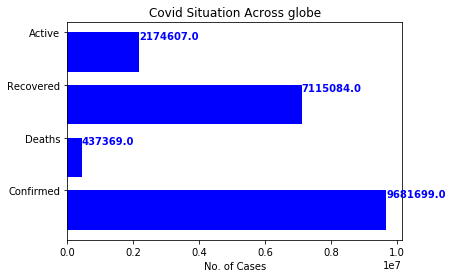

In [41]:
x = ['Confirmed', 'Deaths', 'Recovered', 'Active']
y = df_country[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()
fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('Covid Situation Across globe')
plt.xlabel('No. of Cases')
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')


In [42]:
print(f"Out of every 1 million peoples approx {round(df_country['Cases per Million'].mean())} persons are infected with covid and out of every 100 people infected with covid {round(df_country['Death per 100 confirmed'].mean())} dies because of covid which also the recovery rate of covid in the world is {round(df_country['Recovery Rate per 100'].mean())} shows that 93 out of every 100 people survives covid infection and the average active ratio is {round(df_country['Active Ratio'].mean(),2)}%.) ")

Out of every 1 million peoples approx 2321 persons are infected with covid and out of every 100 people infected with covid 3 dies because of covid which also the recovery rate of covid in the world is 93 shows that 93 out of every 100 people survives covid infection and the average active ratio is 26.95%.) 


In [65]:
print(f"Maximum no. of cases are in {df_country.Country.values[df_country.Confirmed == df_country.Confirmed.max()]}")

Maximum no. of cases are in ['Brazil']


## Time Series Plot for world

In [43]:
ts_world = df[['Date','total_cases', 'total_recovered', 'total_death']].groupby(['Date']).sum()

In [44]:
ts_world.index = pd.to_datetime(ts_world.index)

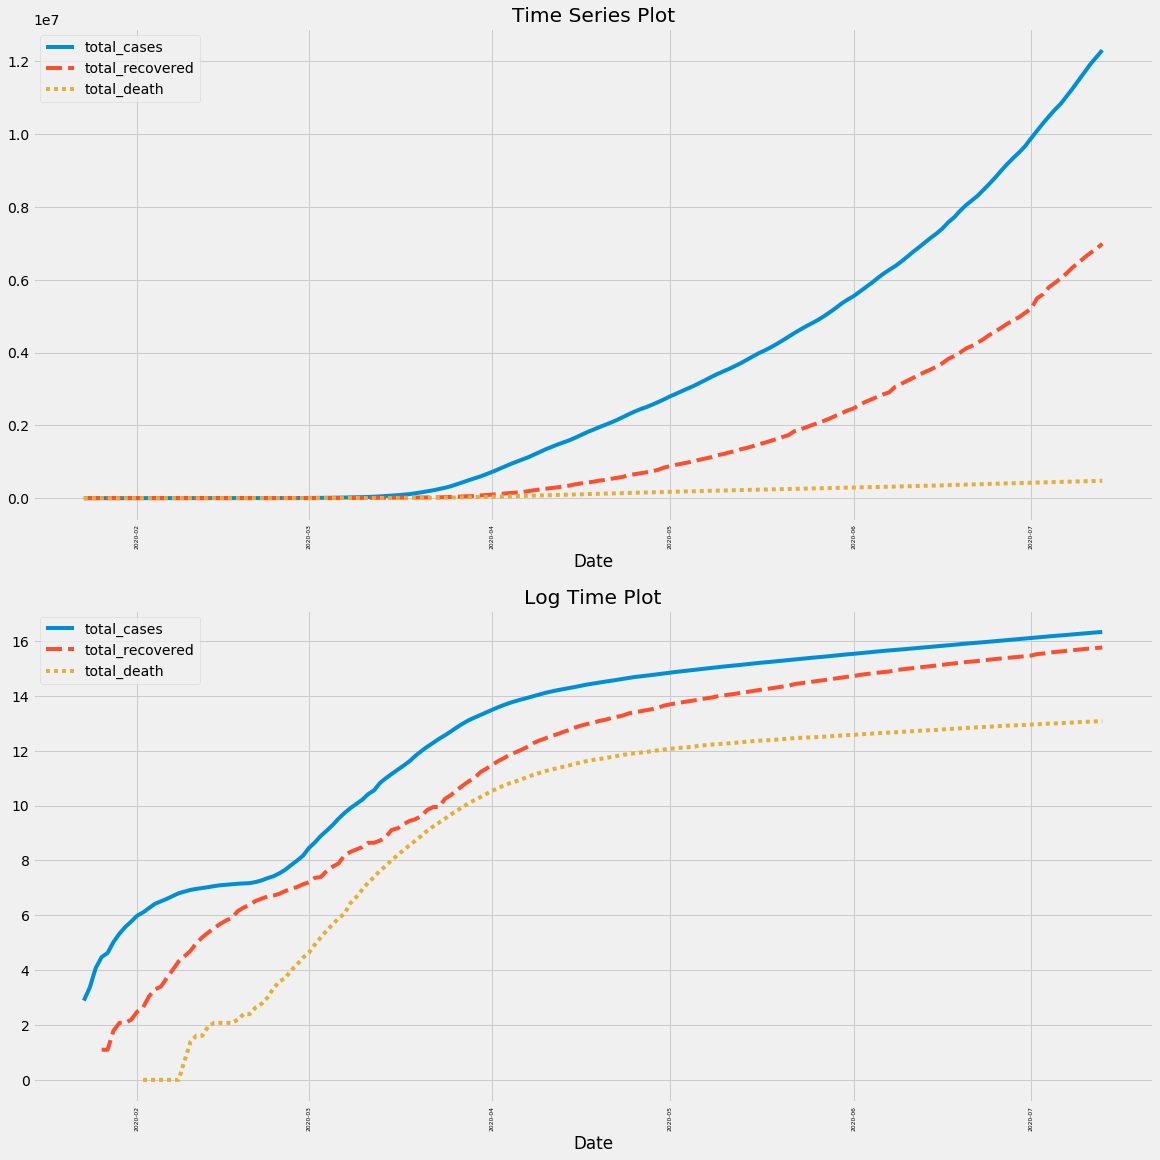

In [45]:
from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')

fig = plt.figure(constrained_layout=True, figsize=(16,16))
grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Time Series Plot')
sns.lineplot(data = ts_world)
plt.xticks(rotation = 90,size=6)

ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('Log Time Plot')
sns.lineplot(data = np.log(ts_world))
plt.xticks(rotation = 90,size=6)


plt.show()

# Confirmed cases per million

Final relative ranking sorted on 'Cases per Million' (10 countries with most cases per million only). In this list, countries with less than a million inhabitants and US are excluded.On July 7th, Qatar is the country with most confirmed cases per million inhabitants

In [46]:
df_country = df_country.sort_values(['Cases per Million'], ascending = False).reset_index(drop=True)
df_country[['Country','ISO','Cases per Million']].head(20).style.background_gradient(cmap='Reds', subset = ['Cases per Million'])

## World map plot for confirmed cases per millions

In [47]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Cases per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona confirmed cases per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

## time series plot of confirmed cases

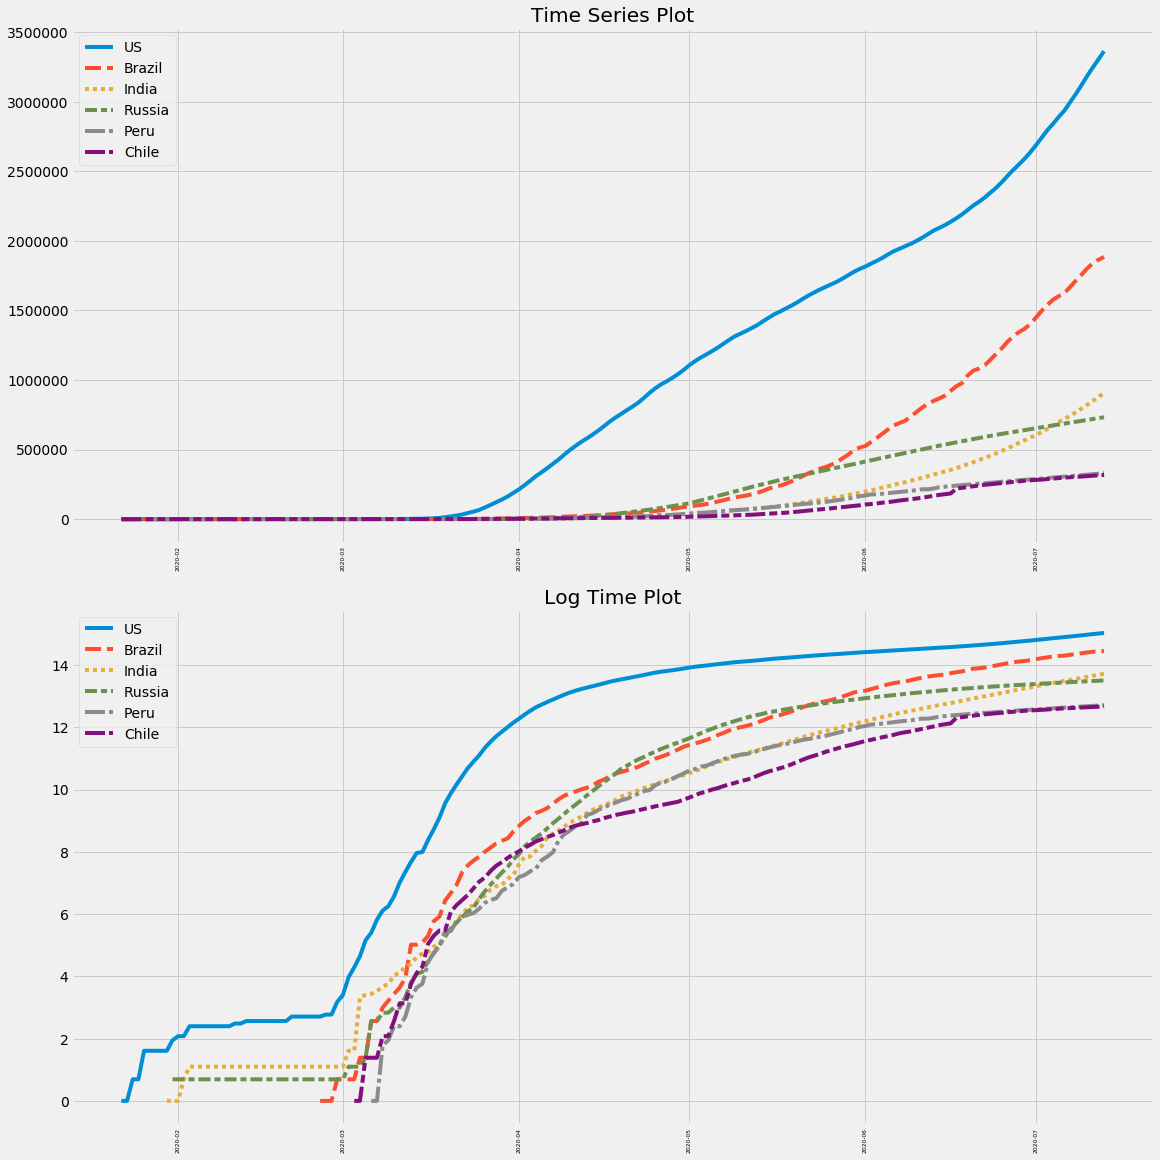

In [48]:
ts_country = df_confirmed.drop(columns = ['Lat', 'Long', 'Province/State'])
ts_country = ts_country.groupby(['Country/Region']).sum()

ts_country = ts_country.sort_values(by = ts_country.columns[-1], ascending = False).head(6)
ts_country = ts_country.transpose()
ts_country.index = pd.to_datetime(ts_country.index)

from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')

fig = plt.figure(constrained_layout=True, figsize=(16,16))
grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Time Series Plot')
sns.lineplot(data = ts_country)
plt.xticks(rotation = 90,size=6)

ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('Log Time Plot')
sns.lineplot(data = np.log(ts_country))
plt.xticks(rotation = 90,size=6)

plt.show()

# Deaths Per Million

In [49]:
df_country = df_country.sort_values(['Deaths per Million'], ascending = False).reset_index(drop=True)

#save a copy
countries = df_country.copy()

df_country[['Country','ISO','Deaths per Million']].head(10).style.background_gradient(cmap='Reds', subset = ['Deaths per Million'])

## World map for deaths per million

In [50]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Deaths per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Deaths per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

## Time Series Plot

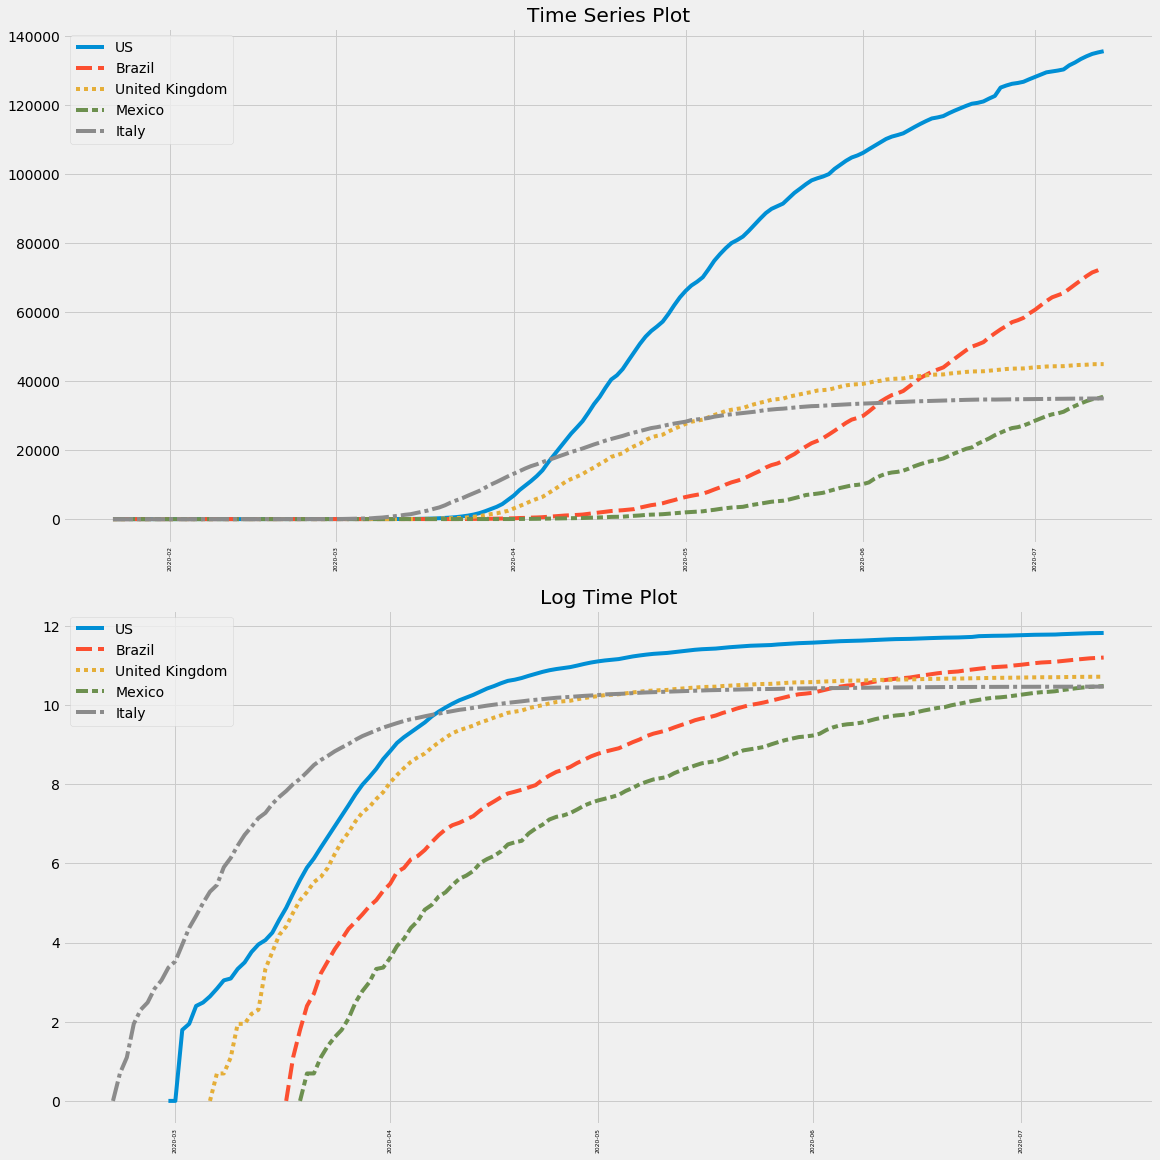

In [51]:
ts_country = df_death.drop(columns = ['Lat', 'Long', 'Province/State'])
ts_country = ts_country.groupby(['Country/Region']).sum()

ts_country = ts_country.sort_values(by = ts_country.columns[-1], ascending = False).head(5)
ts_country = ts_country.transpose()

ts_country.index = pd.to_datetime(ts_country.index)

fig = plt.figure(constrained_layout=True, figsize=(16,16))
grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Time Series Plot')
sns.lineplot(data = ts_country)
plt.xticks(rotation = 90,size=6)

ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('Log Time Plot')
sns.lineplot(data = np.log(ts_country))
plt.xticks(rotation = 90,size=6)

plt.show()

# recovery

In [52]:
df_country = df_country.sort_values(['Recoveries per Million'], ascending = False).reset_index(drop=True)

#save a copy
countries = df_country.copy()

df_country[['Country','ISO','Recoveries per Million']].head(10).style.background_gradient(cmap='Greens', subset = ['Recoveries per Million'])

## World map for recovery rate

In [53]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Recoveries per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Recovery Rate",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

## Time Series

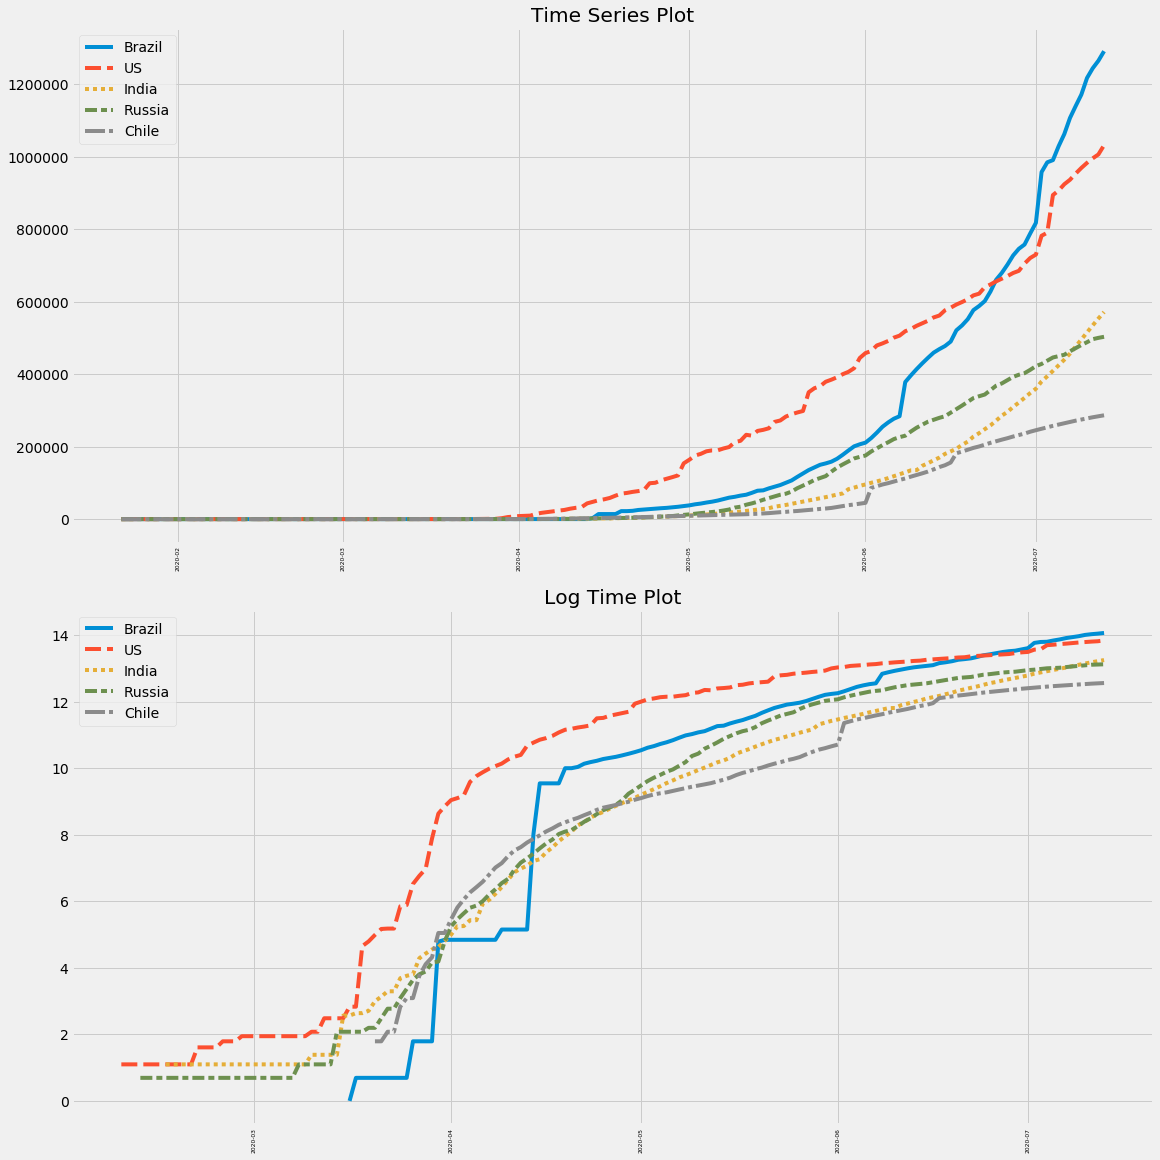

In [55]:
ts_country = df_recovered.drop(columns = ['Lat', 'Long', 'Province/State'])
ts_country = ts_country.groupby(['Country/Region']).sum()

ts_country = ts_country.sort_values(by = ts_country.columns[-1], ascending = False).head(5)
ts_country = ts_country.transpose()

ts_country.index = pd.to_datetime(ts_country.index)

fig = plt.figure(constrained_layout=True, figsize=(16,16))
grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

## Customizing the histogram grid. 
ax1 = fig.add_subplot(grid[0, :2])
## Set the title. 
ax1.set_title('Time Series Plot')
sns.lineplot(data = ts_country)
plt.xticks(rotation = 90,size=6)

ax2 = fig.add_subplot(grid[1, :2])
## Set the title. 
ax2.set_title('Log Time Plot')
sns.lineplot(data = np.log(ts_country))
plt.xticks(rotation = 90,size=6)

plt.show()

# Death relative to number of confirmed cases

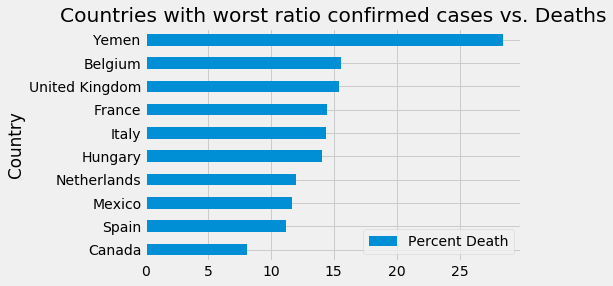

In [56]:
df_country = df_country.drop(columns = ['Population (million)', 'ISO', 'Cases per Million', 'Deaths per Million'])
df_country['Percent Death'] = round(((df_country.Deaths / df_country.Confirmed)*100),2)
#filter countries with at least 100 deaths
df_country = df_country[(df_country.Deaths >= 100)]

#set font size for plotting
#plt.rcParams.update({'font.size': 12})

#create barplot
se = df_country[['Country', 'Percent Death']].sort_values(by = "Percent Death", ascending = False).set_index("Country")
se = se[0:10].sort_values(by = "Percent Death", ascending = True)
se.plot.barh()
plt.title("Countries with worst ratio confirmed cases vs. Deaths")
plt.xticks(rotation=0);

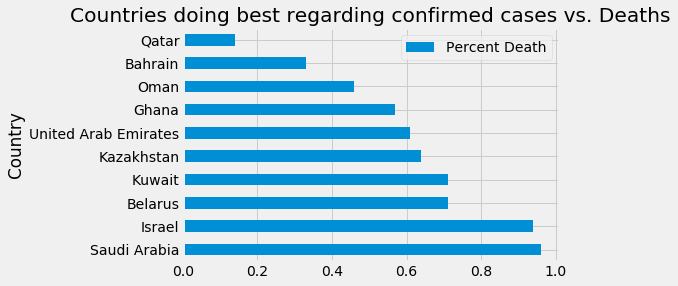

In [57]:
#create barplot
se = df_country[['Country', 'Percent Death']].sort_values(by = "Percent Death", ascending = False).set_index("Country")
se = se[-10:]
se.plot.barh()
plt.title("Countries doing best regarding confirmed cases vs. Deaths")
plt.xticks(rotation=0);

Yemen, Belgium and Ghana are doing best when looking at the number of deadly victims relative to the number of confirmed cases. Regarding the rich countries, Saudi Arabia and the United Arab Emirates, I suspect that this may be due to a high level of testing.